## Assignment: $k$ Means Clustering

### `! git clone https://www.github.com/ds4e/clustering`

### **Do Q1 and one other question.**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

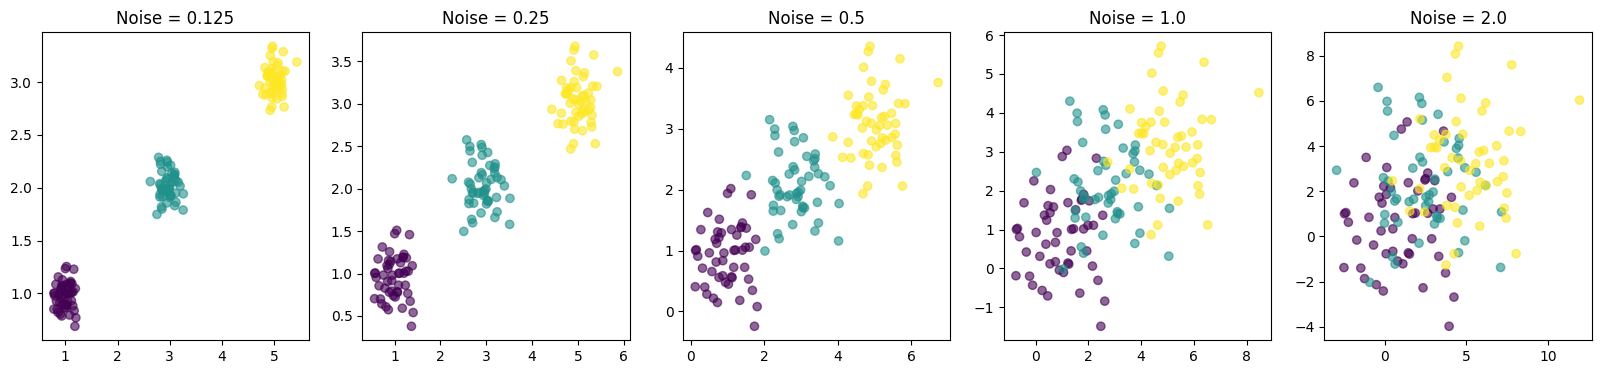

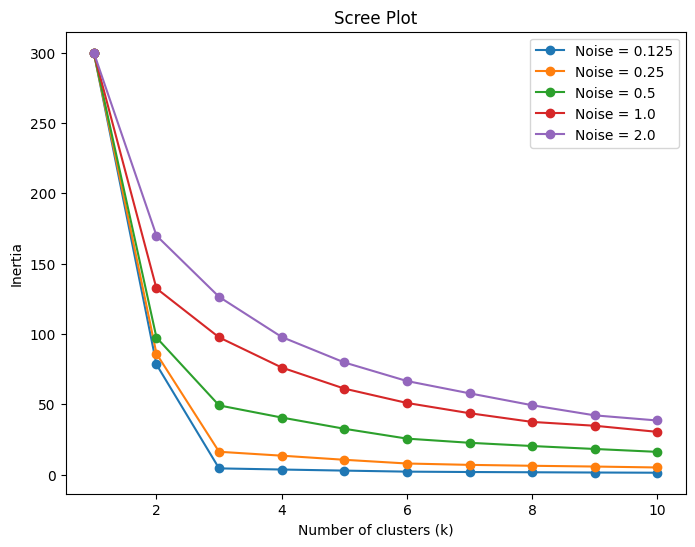

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

def createData(noise, N=50):
    np.random.seed(100)  # Set the seed for replicability
    X1 = np.array([np.random.normal(1, noise, N), np.random.normal(1, noise, N)])
    X2 = np.array([np.random.normal(3, noise, N), np.random.normal(2, noise, N)])
    X3 = np.array([np.random.normal(5, noise, N), np.random.normal(3, noise, N)])
    gdf1 = pd.DataFrame({'x1': X1[0, :], 'x2': X1[1, :], 'group': 'a'})
    gdf2 = pd.DataFrame({'x1': X2[0, :], 'x2': X2[1, :], 'group': 'b'})
    gdf3 = pd.DataFrame({'x1': X3[0, :], 'x2': X3[1, :], 'group': 'c'})
    df = pd.concat([gdf1, gdf2, gdf3], axis=0)
    return df

def plot_clusters(dfs, noise_levels):
    fig, axes = plt.subplots(1, len(dfs), figsize=(20, 4))
    for i, (df, noise) in enumerate(zip(dfs, noise_levels)):
        axes[i].scatter(df['x1'], df['x2'], c=df['group'].astype('category').cat.codes, cmap='viridis', alpha=0.6)
        axes[i].set_title(f'Noise = {noise}')
    plt.show()

def plot_scree(dfs, noise_levels, max_k=10):
    fig, ax = plt.subplots(figsize=(8, 6))
    for df, noise in zip(dfs, noise_levels):
        X = df[['x1', 'x2']].values
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        inertia = []
        for k in range(1, max_k+1):
            kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
            kmeans.fit(X_scaled)
            inertia.append(kmeans.inertia_)
        ax.plot(range(1, max_k+1), inertia, marker='o', label=f'Noise = {noise}')
    ax.set_xlabel('Number of clusters (k)')
    ax.set_ylabel('Inertia')
    ax.set_title('Scree Plot')
    ax.legend()
    plt.show()

# Generate datasets with increasing noise levels
noise_levels = [0.125, 0.25, 0.5, 1.0, 2.0]
datasets = [createData(noise) for noise in noise_levels]

# Scatterplots
plot_clusters(datasets, noise_levels)

# Scree plots
plot_scree(datasets, noise_levels)


As the noise level increases from 0.125 to 2.0, the visual distinctness of the clusters decreases significantly. At low noise levels, the clusters are well-separated, making it easy to distinguish between them. However, as noise increases, the clusters start to overlap, making it harder to visually identify distinct groups.

In the scree plots, we observe that at low noise levels, there is a clear "elbow" at k=3, indicating the optimal number of clusters. This means that the data naturally supports a 3-cluster solution. However, as noise increases, the distinction between clusters becomes less obvious, and the elbow becomes less pronounced. At the highest noise level (2.0), the scree plot suggests a more gradual decline in inertia, making it difficult to identify a definitive elbow point.

The elbow method is based on the idea that adding more clusters reduces inertia, but after a certain point, the reduction in inertia slows down significantly. This "elbow" is where the optimal number of clusters is likely found. In this simulation, the elbow is clearer when clusters are distinct (low noise) and becomes harder to identify as noise increases.










**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

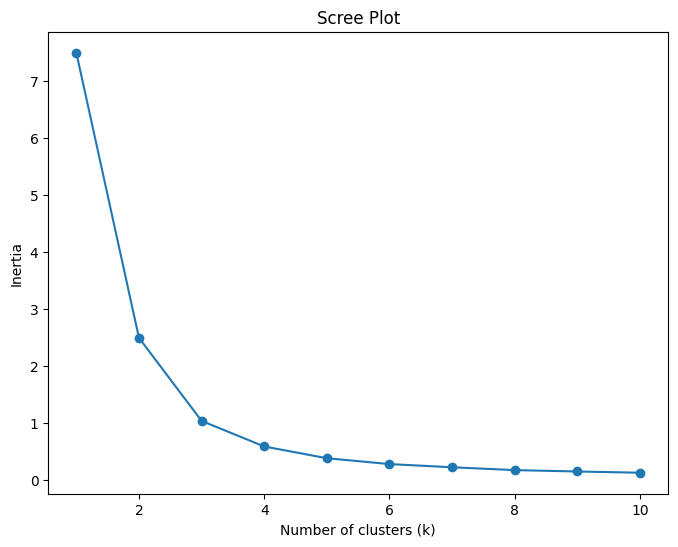

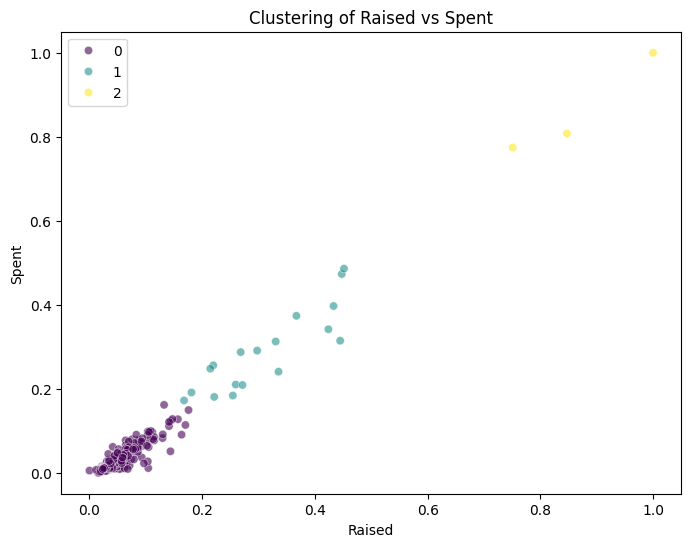

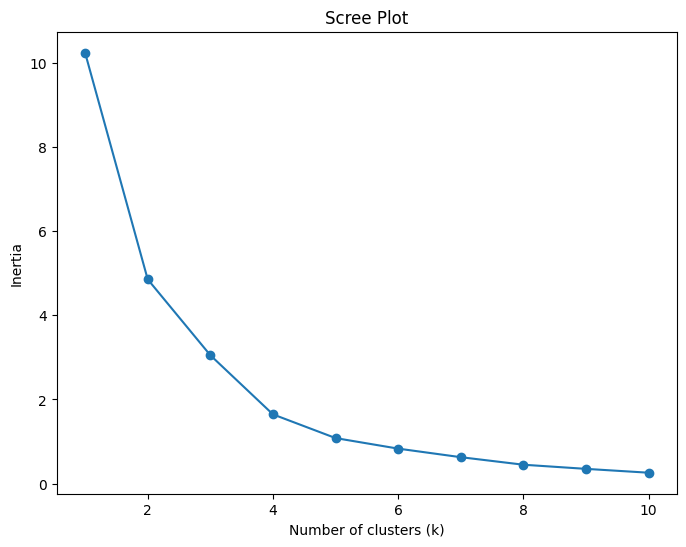

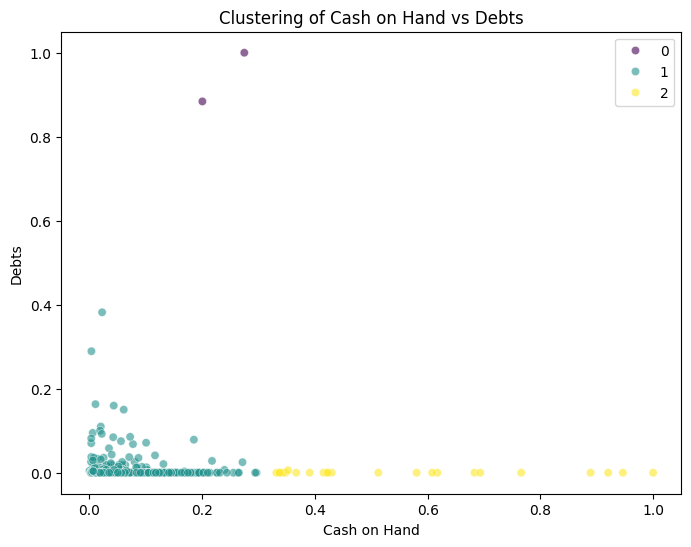

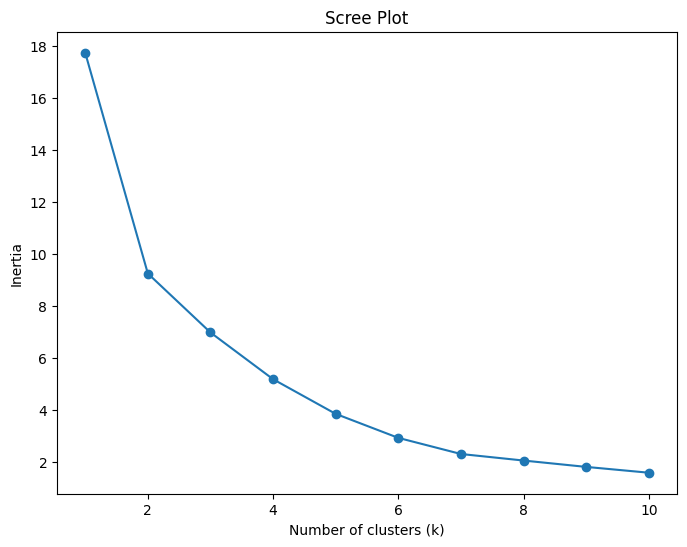

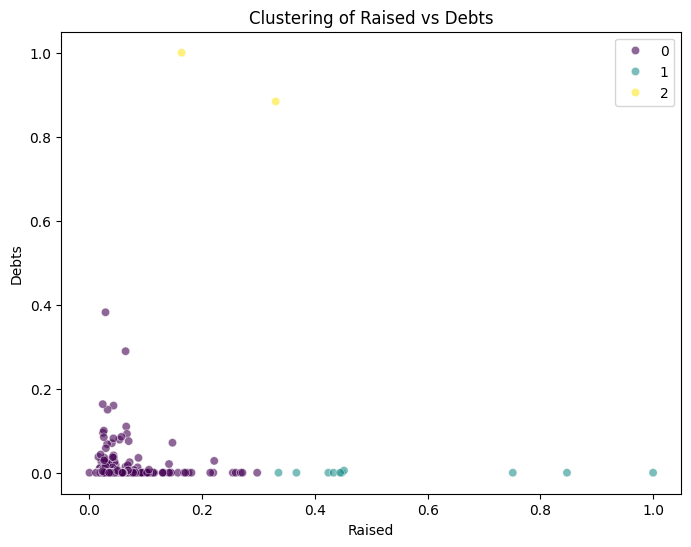

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

def load_and_clean_data(filepath):
    df = pd.read_csv(filepath)
    df = df[['Raised', 'Spent', 'Cash on Hand', 'Debts']]
    df = df.replace('[\$,]', '', regex=True).astype(float)
    return df.dropna()

def normalize_data(df, columns):
    scaler = MinMaxScaler()
    df[columns] = scaler.fit_transform(df[columns])
    return df

def plot_scree(df, columns, max_k=10):
    X = df[columns].values
    inertia = []
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_k+1), inertia, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Scree Plot')
    plt.show()

def cluster_and_plot(df, x_col, y_col, n_clusters):
    X = df[[x_col, y_col]].values
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    df['Cluster'] = kmeans.fit_predict(X)
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[x_col], y=df[y_col], hue=df['Cluster'], palette='viridis', alpha=0.6)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'Clustering of {x_col} vs {y_col}')
    plt.legend()
    plt.show()
    return df

# Load and clean data
data_path = '/content/2022 election cycle fundraising.csv'
df = load_and_clean_data(data_path)

# Normalize data
columns_to_normalize = ['Raised', 'Spent', 'Cash on Hand', 'Debts']
df = normalize_data(df, columns_to_normalize)

# Scree plot for Raised & Spent
plot_scree(df, ['Raised', 'Spent'])

# Scatter plot for Raised & Spent
n_clusters_rs = 3  # Choose based on scree plot elbow
df = cluster_and_plot(df, 'Raised', 'Spent', n_clusters_rs)

# Scree plot for Cash on Hand & Debts
plot_scree(df, ['Cash on Hand', 'Debts'])

# Scatter plot for Cash on Hand & Debts
n_clusters_cd = 3  # Choose based on scree plot elbow
df = cluster_and_plot(df, 'Cash on Hand', 'Debts', n_clusters_cd)

# K-means clustering on all four variables
plot_scree(df, columns_to_normalize)
n_clusters_all = 3  # Choose based on scree plot elbow
df = cluster_and_plot(df, 'Raised', 'Debts', n_clusters_all)

Data Cleaning: The dollar values in Raised, Spent, Cash on Hand, and Debts were messy due to formatting issues like commas and dollar signs. Cleaning involved stripping these characters and converting the values to float before performing any numerical analysis.

Raised vs. Spent Clustering: After normalizing the data, the scree plot helped identify the optimal number of clusters (around 3). The scatter plot showed distinct groupings of candidates based on their fundraising and spending patterns. The smallest clusters likely contained either underfunded or extremely well-funded candidates. Examining the smallest clusters could reveal high-profile or highly contested races.

Cash on Hand vs. Debts Clustering: This produced different clustering results compared to Raised vs. Spent. Some candidates may have raised a lot but still had high debt, while others might have been more conservative with spending. The presence of debt significantly altered how candidates were grouped.

Clustering on All Variables: When clustering on all four variables, the results combined the patterns from the previous two analyses. Candidates who were previously outliers in individual comparisons may have been grouped differently when considering all financial metrics together.

K-Means Insights: The algorithm provided useful insights into fundraising strategies, helping identify which politicians were high spenders, which relied on debt, and which had substantial cash reserves. However, political context matters—some high-debt candidates may have been in tight races, and some high-cash candidates may not have faced strong opponents. Further investigation into race competitiveness could validate the clusters.

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the election?

**Q4.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q5.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?